In [1]:
#importing the required modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [2]:
home_dir = os.path.join(r'Z:/balint/numt/Michael/data/')

In [3]:
numts_array=pd.read_csv(home_dir+'numt_master_array.csv')
numts_array.head()

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,g_up_flanking,g_down_flanking,"mt_up_flanking (if strand is negative, the coordinates are corrected)","mt_down_flanking (if strand is negative, the coordinates are corrected)",ensembl_gene_id,ensembl_description
0,17245,0.0,0.0,MT,0,0,17245,17245,+,+,17245,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,NaN,NaN,TACAAATTGTATAATATTTGGACTAAACCCCCTTTCCCACCCCAAG...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,ENSOCUG00000029081,NaN
1,3398,0.0,0.0,1,114731432,6976,4680,4681,+,+,194850757,taGTAAAATTATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,TAGTAAAACCATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,ACAAAAGACTCTGAATAGCCAAAGCGATCCTGAACAAGAAAAATCA...,TATATATATTTATATATATATGTATATATGTACATATATATAACTA...,CCTTCGCCTCAAAACGAGAAGTAGAGACTATTGAACTAACAACCAC...,AACTGCTAATTCATGCTCCCATGTCTAACCCCATGGCTTTCTCAAC...,ENSOCUG00000006104,cilia and flagella associated protein 300 [Sou...
2,3120,0.0,0.0,GL019308,67160,883,4892,4945,+,+,88228,CAAGGCCATGAAGCATGCACACACTGCCCATCGCTCTCCTCAAACA...,CAAGGCCATGAAGCACGCACACACCGCCCGTCACCCTCCTCAAGTG...,GATAAACCCCGATAAACTTTACCACTCTTTGCCAACTCAGCCTCTA...,ATGAAGGGGCAAAGAGTAATTTTACAGTCGAGAGGGCTAGCAGTCA...,TACCGCCATCTTCAGCGAACCCTAAAAAGGAGCAAAAGTAAGCTCA...,TAGGGGCTATTAACTTTATTACAACTATTATTAATATGAAAGCCCC...,ENSOCUG00000031196,NaN
3,1888,0.0,0.0,GL019308,62527,12805,3439,3462,+,+,88228,AATTATTCATAGCCTCAATGATGAACAAGACATCCAAAAAACAGGA...,AATTATTCACAGCCTcaaTGATGAACAGGATATCCGAAAGATAGGC...,GTAGGAATTATATCCTTCCTCCTCATCGGCTGATGGCATGGCCAAG...,ACGTATACATGAGTTGTTCTTACATAATTGAATATACCTGCAATGC...,TGCCTAGGCGCAATCACTACCTTATTCACAGCCCTATGTGCCCTCA...,GTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGTACAC...,ENSOCUG00000037635,NaN
4,1824,0.0,0.0,AAGW02081594,14016,6061,3040,3073,+,+,24576,TTCTTTGGACACCCTGAGGTATATATTCTTATCCTTCCAGGATTCG...,TTTTTCGGGCACCCCGAAGTATATATTCTTATTCTTCCAGGATTTG...,GACATGTCAAAGGAACGCAGAAGCCAGCTTGAAAAAGTCCTCAACA...,TGAAATAGCTATCACTATTCAGGTATGCCACTATTCTTCTAGGCAT...,ATATGAAAGCCCCTGCAATATCTCAATATCAAACCCCCTTATTCGT...,ATTCTCCTAGGTATCTATTTTACCCTACTTCAAGCATCGGAGTATT...,NaN,NaN


In [4]:
#defining a function for calculating identity
def identity(g_sequence):
    seq_index=g_sequences[g_sequences==g_sequence].index[0]
    g_sequence=g_sequence.upper()
    mt_sequence=mt_sequences[seq_index].upper()
    identical_residues=0
    for res_index, g_residue in enumerate(g_sequence):
        mt_residue=mt_sequence[res_index]
        if g_residue==mt_residue:
            identical_residues+=1
    identity=(identical_residues/len(g_sequence))*100
    return identity

In [5]:
g_sequences=numts_array['g_sequence']

In [6]:
mt_sequences=numts_array['mt_sequence']

In [7]:
g_ids=numts_array['g_id']
g_ids.index=g_ids

In [8]:
chr_id_mask=g_ids.str.len()<3
chr_ids=g_ids[chr_id_mask]

In [9]:
scaffold_id_mask=g_ids.str.len()>3
scaffold_ids=g_ids[scaffold_id_mask]

In [10]:
identities=g_sequences.apply(identity)
identities.index=g_ids
df=pd.DataFrame(identities)
df

,g_sequence
g_id,
MT,100.000000
1,86.653854
GL019308,83.558877
GL019308,79.608295
AAGW02081594,80.766732
...,...
GL019047,67.611336
AAGW02081404,80.000000
GL019311,71.052632


In [11]:
lengths=g_sequences.apply(lambda seq:len(seq))
lengths.index=g_ids
df['lengths']=lengths
df.columns=['identity','length']
df

,identity,length
g_id,,
MT,100.000000,17245
1,86.653854,4683
GL019308,83.558877,4951
GL019308,79.608295,3472
AAGW02081594,80.766732,3078
...,...,...
GL019047,67.611336,247
AAGW02081404,80.000000,140
GL019311,71.052632,228


In [12]:
scaffolds=df[df.index.isin(scaffold_ids)]
scaffolds

,identity,length
g_id,,
GL019308,83.558877,4951
GL019308,79.608295,3472
AAGW02081594,80.766732,3078
AAGW02081594,79.815359,2383
GL019326,80.320000,1875
...,...,...
AAGW02081404,78.481013,158
GL019047,67.611336,247
AAGW02081404,80.000000,140


In [13]:
chrs=df[df.index.isin(chr_ids)]
len(chrs)

52

Text(0.5, 0, 'Sequence length (bp)')

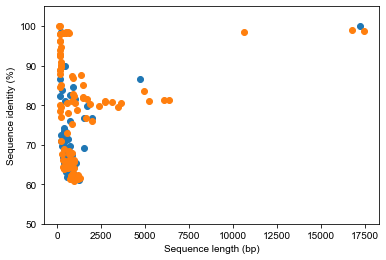

In [14]:
fig,ax=plt.subplots(1,1)
sns.set(style = "darkgrid")

ax.scatter(chrs['length'], chrs['identity'])
plt.ylim(50,105)
m, b = np.polyfit(chrs['length'], chrs['identity'], 1)
#plt.plot(chrs_log10, m*chrs_log10 + b, 'orange')

ax.scatter(scaffolds['length'], scaffolds['identity'])
plt.ylim(50,105)
m, b = np.polyfit(scaffolds['length'], scaffolds['identity'], 1)
#plt.plot(scaffolds_log10, m*scaffolds_log10 + b, 'lightblue')

plt.ylabel('Sequence identity (%)')
plt.xlabel('Sequence length (bp)')

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Sequence length (bp)')

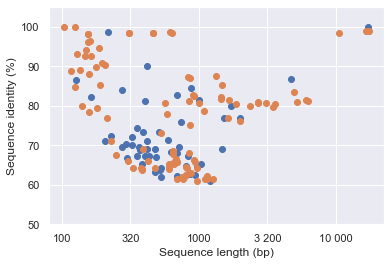

In [15]:
fig,ax=plt.subplots(1,1)
sns.set(style = "darkgrid")
ax.set_xticklabels(['0','100','320','1000','3 200','10 000'])

chrs_log10=chrs['length'].apply(lambda value:np.log10(value))
scaffolds_log10=scaffolds['length'].apply(lambda value:np.log10(value))

ax.scatter(chrs_log10, chrs['identity'])
plt.ylim(50,105)
m, b = np.polyfit(chrs_log10, chrs['identity'], 1)
#plt.plot(chrs_log10, m*chrs_log10 + b, 'orange')

ax.scatter(scaffolds_log10, scaffolds['identity'])
plt.ylim(50,105)
m, b = np.polyfit(scaffolds_log10, scaffolds['identity'], 1)
#plt.plot(scaffolds_log10, m*scaffolds_log10 + b, 'lightblue')

plt.ylabel('Sequence identity (%)')
plt.xlabel('Sequence length (bp)')

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  if sys.path[0] == '':


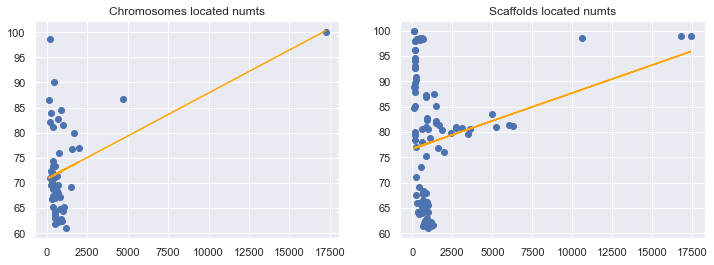

In [16]:
fig,axs=plt.subplots(1,2, figsize=(12,4))

axs[0].scatter(chrs['length'], chrs['identity'])
axs[0].set_title('Chromosomes located numts')
m, b = np.polyfit(chrs['length'], chrs['identity'], 1)
axs[0].plot(chrs['length'], m*chrs['length'] + b, 'orange')

axs[1].scatter(scaffolds['length'], scaffolds['identity'])
axs[1].set_title('Scaffolds located numts')
m, b = np.polyfit(scaffolds['length'], scaffolds['identity'], 1)
axs[1].plot(scaffolds['length'], m*scaffolds['length'] + b, 'orange')
plt.savefig('../../results/length_vs_identity.png', dpi = 150, quality = 95)

In [181]:
pearsonr(chrs['length'], chrs['identity'])

(0.4518451672653433, 0.0007722885960220438)

In [182]:
pearsonr(scaffolds['length'], scaffolds['identity'])

(0.23569965304924306, 0.017653776168246045)

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """
C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


[Text(1.5, 0, '0'),
 Text(2.0, 0, '100'),
 Text(2.5, 0, '320'),
 Text(3.0, 0, '1000'),
 Text(3.5, 0, '3 200'),
 Text(4.0, 0, '10 000'),
 Text(4.5, 0, '')]

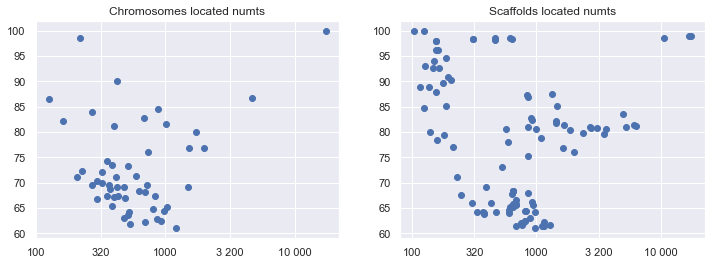

In [187]:
fig,axs=plt.subplots(1,2, figsize=(12,4))

axs[0].scatter(chrs_log10, chrs['identity'])
axs[0].set_title('Chromosomes located numts')
axs[0].set_xticklabels(['0','100','320','1000','3 200','10 000'])

axs[1].scatter(scaffolds_log10, scaffolds['identity'])
axs[1].set_title('Scaffolds located numts')
axs[1].set_xticklabels(['0','100','320','1000','3 200','10 000'])

In [52]:
scaffolds['length'].sort_values(ascending=False)

g_id
AAGW02081404    17431
AAGW02081404    16795
AAGW02081404    10635
GL019271         6323
GL019056         6051
                ...  
AAGW02081404      128
GL018706          124
AAGW02081404      124
AAGW02081404      116
AAGW02081404      104
Name: length, Length: 101, dtype: int64

In [57]:
genome_size=2737490501
sum_numt_size=sum(df['length'])
sum_numt_size/genome_size

7.098362530537234e-05

In [58]:
sum_numt_size

194317

In [86]:
#number of numts per chr
redundant_g_ids=numts_array['g_id']
g_ids=pd.Series(numts_array['g_id'].unique())
numt_number=g_ids.apply(lambda g_id:len(redundant_g_ids[g_id]))
numt_number.index=g_ids
numt_number.sort_values()

3                1
MT               2
GL018925         2
GL019149         2
GL019383         2
21               2
GL018862         2
11               2
16               2
2                2
20               2
13               2
GL019311         2
14               2
19               2
AAGW02079688     3
17               3
GL018748         3
12               3
7                3
GL019047         3
GL019010         3
GL018817         4
9                4
18               4
AAGW02081594     4
GL019308         5
GL019465         5
15               5
GL018741         5
GL019326         6
GL019086         8
GL019235         8
4                8
GL019525         8
GL019056         8
GL019271         8
GL018706         8
GL018786         8
GL018826         8
GL018700         8
GL018705         8
GL018992         8
GL018744         8
1                9
AAGW02083714    12
AAGW02081404    30
dtype: int64

In [138]:
#length of each chr, scaffold
chr_lengths=numts_array['g_size']
chr_lengths.index=redundant_g_ids
chr_lengths=lengths.drop_duplicates()
chr_lengths

g_id
MT                  17245
1               194850757
GL019308            88228
AAGW02081594        24576
GL019326            81722
GL018741          2352391
18               69800736
9               116251907
12              155355395
GL018705          6124611
17               85008467
GL018700         13461802
19               57279966
GL019465            51331
GL018817           947161
13              143360832
GL018826           922215
GL018748          2148096
2               174332312
7               173684459
16               84478945
GL018786          1165285
GL018706          5787221
4                91394100
AAGW02081404        27691
GL019271            89743
GL019056           204766
GL019383            64055
GL019525            45853
GL019149           139324
GL018925           588789
20               33191332
AAGW02083714         5785
GL018992           288293
AAGW02079688        74942
GL019086           291127
GL019010           279267
15              109054052
GL01904

In [139]:
numt_lengths=numts_array['g_length']
numt_lengths.index=redundant_g_ids
numt_lengths

g_id
MT              17245
1                4680
GL019308         4892
GL019308         3439
AAGW02081594     3040
                ...  
GL019047          243
AAGW02081404      136
GL019311          218
21                321
GL018744          319
Name: g_length, Length: 153, dtype: int64

In [136]:
def get_length(g_id):
    subvector=numt_lengths[g_id]
    if type(subvector) == pd.core.series.Series:
        return sum(subvector)
    else:
        return subvector

In [151]:
#lengths of numts per each chr
sum_numt_lengths=g_ids.apply(get_length)
sum_numt_lengths.index=g_ids
sum_numt_lengths

MT              17245
1                9427
GL019308        11402
AAGW02081594     7606
GL019326         7865
GL018741         5664
18               2621
9                2212
12               1003
GL018705          834
17               1354
GL018700          896
19                930
GL019465         3742
GL018817         3248
13                477
GL018826         5067
GL018748         2234
2                 598
7                1168
16                162
GL018786          210
GL018706          124
4                9071
AAGW02081404    50811
GL019271         6228
GL019056         5970
GL019383         5979
GL019525         3547
GL019149         3556
GL018925         3573
20               1090
AAGW02083714      630
GL018992          629
AAGW02079688     2297
GL019086          627
GL019010         2421
15               2997
GL019047         1244
GL018862         1324
11                806
GL019311          864
14                450
3                 228
GL019235          375
21        

In [143]:
pearsonr(chr_lengths, sum_numt_lengths)

(-0.15702889544936804, 0.29183526716174985)

In [146]:
numt_percent=g_ids.apply(lambda g_id:(sum_numt_lengths[g_id]/chr_lengths[g_id])*100)
numt_percent.index=g_ids
numt_percent.sort_values()

3                 0.000146
16                0.000192
14                0.000275
13                0.000333
2                 0.000343
12                0.000646
7                 0.000672
11                0.000921
17                0.001593
19                0.001624
9                 0.001903
21                0.002061
GL018706          0.002143
15                0.002748
20                0.003284
18                0.003755
1                 0.004838
GL018700          0.006656
4                 0.009925
GL018705          0.013617
GL018744          0.014364
GL018786          0.018021
GL018748          0.103999
GL018862          0.200490
GL019086          0.215370
GL018992          0.218181
GL018741          0.240776
GL018817          0.342920
GL019235          0.358577
GL019047          0.502773
GL018826          0.549438
GL018925          0.606839
GL019010          0.866912
GL019311          1.073212
GL019149          2.552324
GL019056          2.915523
AAGW02079688      3.065037
G

In [147]:
pearsonr(chr_lengths, numt_percent)

(-0.18780883540259108, 0.2061703983848342)

In [157]:
pearsonr(chr_lengths, numt_number)

(-0.24763392217189648, 0.09330228482971926)

In [159]:
identities=[chrs['identity'], scaffolds['identity']]

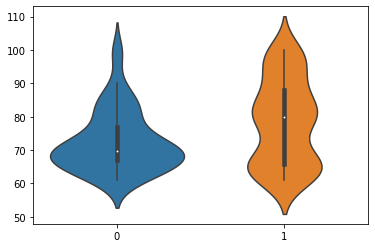

In [162]:
#fig,ax=plt.subplots(1,1)
ax=sns.violinplot(data=identities)